# Q13 By MSahil

Using a dataset that contains the daily count of rental bikes in the Capital Bikeshare system, as well as the corresponding weather and seasonal information, build three regression models to predict the total rental bikes required on a specific day and choose the one with the best coefficient of determination (r squared score).

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv("day.csv")

In [3]:
df.shape

(731, 16)

In [4]:
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


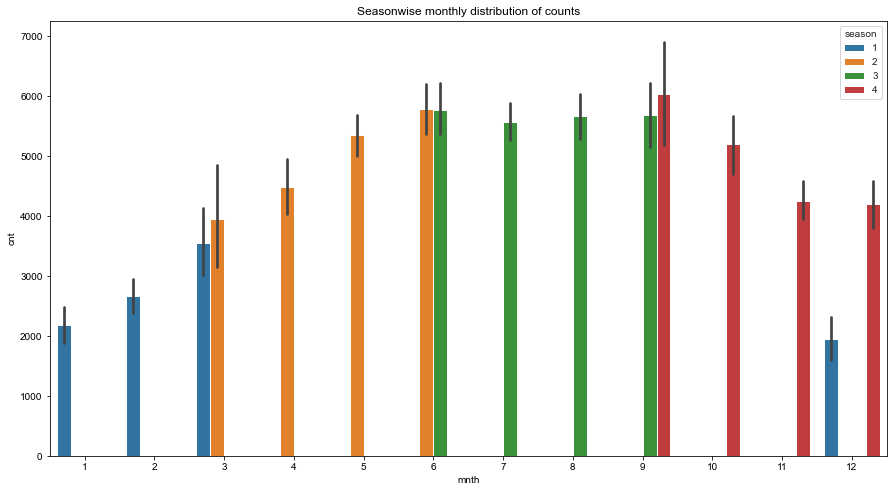

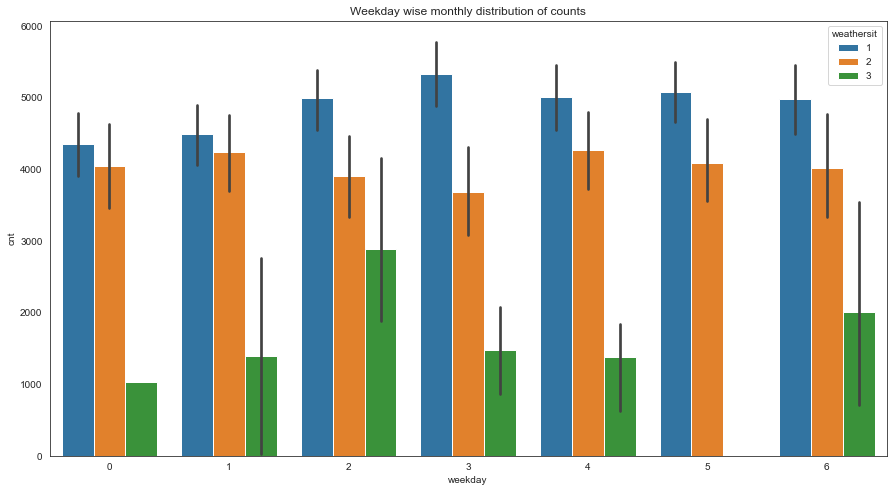

In [5]:
fig,ax=plt.subplots(figsize=(15,8))
sns.set_style('white')
#Bar plot for seasonwise monthly distribution of counts
sns.barplot(x='mnth',y='cnt',data=df[['mnth','cnt','season']],hue='season',ax=ax)
ax.set_title('Seasonwise monthly distribution of counts')
plt.show()
#Bar plot for weekday wise monthly distribution of counts
fig,ax1=plt.subplots(figsize=(15,8))
sns.barplot(x='weekday',y='cnt',data=df[['weekday','cnt','weathersit']],hue='weathersit',ax=ax1)
ax1.set_title('Weekday wise monthly distribution of counts')
plt.show()

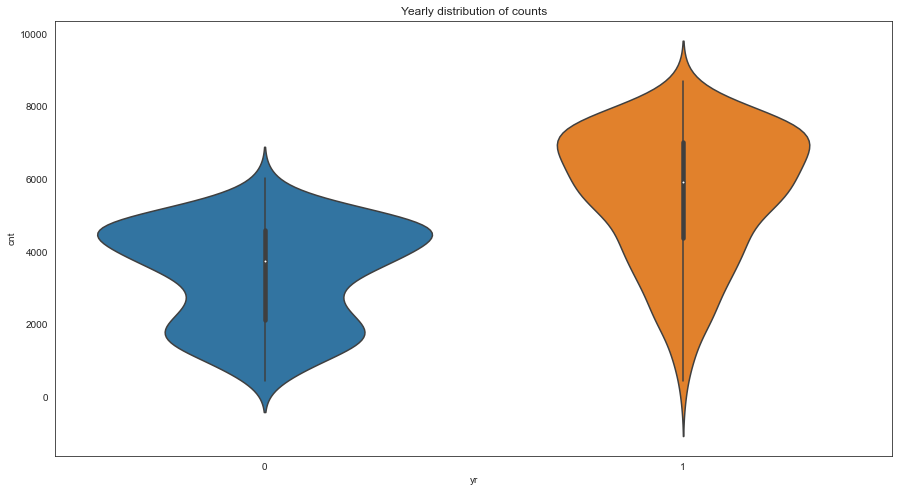

In [6]:
fig,ax=plt.subplots(figsize=(15,8))
#Violin plot for yearly distribution of counts
sns.violinplot(x='yr',y='cnt',data=df[['yr','cnt']])
ax.set_title('Yearly distribution of counts')
plt.show()

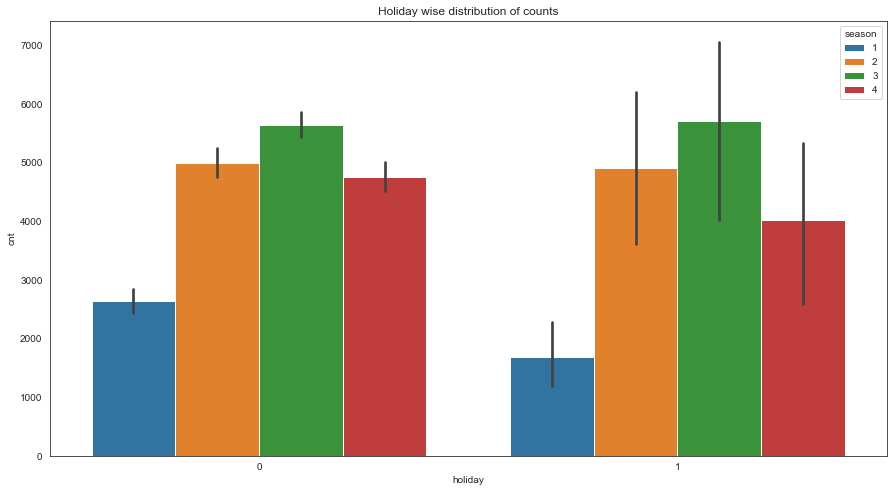

In [7]:
fig,ax=plt.subplots(figsize=(15,8))
#Barplot for Holiday distribution of counts
sns.barplot(data=df,x='holiday',y='cnt',hue='season')
ax.set_title('Holiday wise distribution of counts')
plt.show()

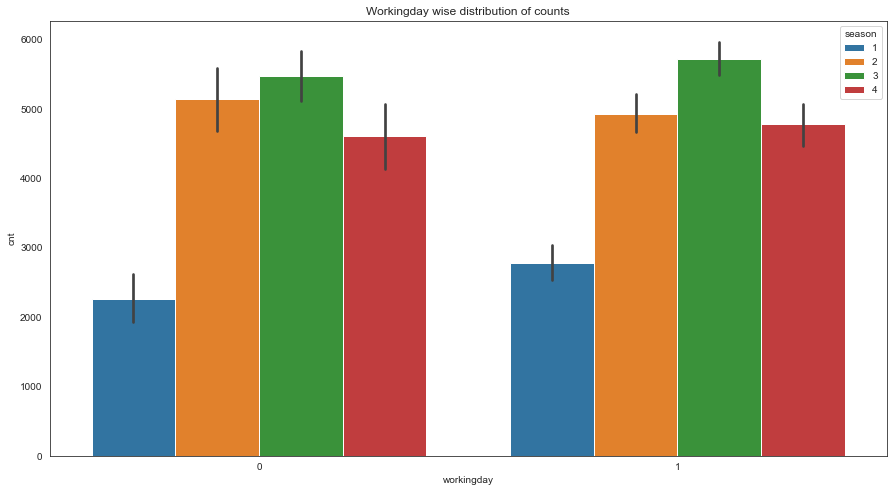

In [8]:
fig,ax=plt.subplots(figsize=(15,8))
#Bar plot for workingday distribution of counts
sns.barplot(data=df,x='workingday',y='cnt',hue='season')
ax.set_title('Workingday wise distribution of counts')
plt.show()

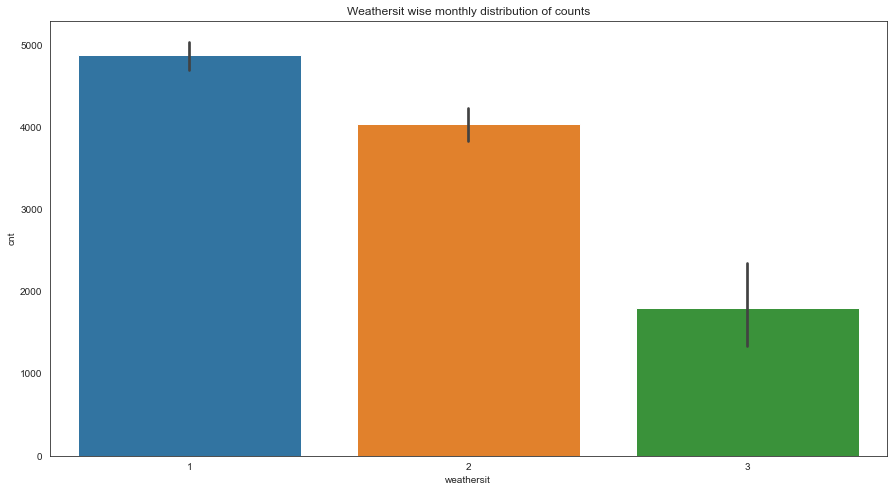

In [9]:
fig,ax1=plt.subplots(figsize=(15,8))
#Bar plot for weather_condition distribution of counts
sns.barplot(x='weathersit',y='cnt',data=df[['mnth','cnt','weathersit']],ax=ax1)
ax1.set_title('Weathersit wise monthly distribution of counts')
plt.show()

In [10]:
from sklearn import preprocessing,metrics,linear_model
from sklearn.model_selection import cross_val_score,cross_val_predict,train_test_split

In [11]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(df.iloc[:,0:-3],df.iloc[:,-1],test_size=0.3, random_state=42)

#Reset train index values
X_train.reset_index(inplace=True)
y_train=y_train.reset_index()

# Reset train index values
X_test.reset_index(inplace=True)
y_test=y_test.reset_index()

print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)
print(y_train.head())
print(y_test.head())

(511, 14) (220, 14) (511, 2) (220, 2)
   index   cnt
0    223  4905
1    684  5445
2    685  5698
3    163  5020
4    394  3624
   index   cnt
0    703  6606
1     33  1550
2    300  3747
3    456  6041
4    633  7538


In [12]:
train_attributes=X_train[['season','mnth','yr','weekday','holiday','workingday','weathersit','hum','temp','windspeed']]
#Create a new dataset for test attributes
test_attributes=X_test[['season','mnth','yr','weekday','holiday','workingday','hum','temp','windspeed','weathersit']]
#categorical attributes
cat_attributes=['season','holiday','workingday','weathersit','yr']
#numerical attributes
num_attributes=['temp','windspeed','hum','mnth','weekday']

In [13]:
#To get dummy variables to encode the categorical features to numeric
train_encoded_attributes=pd.get_dummies(train_attributes,columns=cat_attributes)
print('Shape of transfomed dataframe::',train_encoded_attributes.shape)
train_encoded_attributes.head(5)

Shape of transfomed dataframe:: (511, 18)


,mnth,weekday,hum,temp,windspeed,season_1,season_2,season_3,season_4,holiday_0,holiday_1,workingday_0,workingday_1,weathersit_1,weathersit_2,weathersit_3,yr_0,yr_1
0,8,5,0.415000,0.708333,0.125621,0,0,1,0,1,0,0,1,1,0,0,1,0
1,11,4,0.620417,0.321667,0.152987,0,0,0,1,1,0,0,1,0,1,0,0,1
2,11,5,0.524583,0.345000,0.171025,0,0,0,1,1,0,0,1,1,0,0,0,1
3,6,1,0.494583,0.635000,0.305350,0,1,0,0,1,0,0,1,1,0,0,1,0
4,1,1,0.400833,0.269167,0.215792,1,0,0,0,1,0,0,1,1,0,0,0,1


In [14]:
#Training dataset for modelling
X_train=train_encoded_attributes
y_train=y_train.cnt.values

In [15]:
lr_model=linear_model.LinearRegression()
lr_model

LinearRegression()

In [16]:
lr_model.fit(X_train,y_train)

LinearRegression()

In [17]:
lr=lr_model.score(X_train,y_train)
print('Accuracy of the model :',lr)

Accuracy of the model : 0.8164644195384456


In [18]:
r2_scores = cross_val_score(lr_model, X_train, y_train, cv=3)
print('R-squared scores :',np.average(r2_scores))

R-squared scores : 0.8001876665905119


In [19]:
from sklearn.tree import DecisionTreeRegressor
dtr=DecisionTreeRegressor(random_state = 48)

In [20]:
dtr.fit(X_train,y_train)

DecisionTreeRegressor(random_state=48)

In [21]:
dtr_score=dtr.score(X_train,y_train)
print('Accuracy of model :',dtr_score)

Accuracy of model : 1.0


In [22]:
dtr_score=dtr.score(X_train,y_train)
print('Accuracy of model :',dtr_score)

Accuracy of model : 1.0


In [23]:
r2_scores = cross_val_score(dtr, X_train, y_train, cv=3)
print('R-squared scores :',np.average(r2_scores))

R-squared scores : 0.7588045848463172


In [24]:
from sklearn.ensemble import RandomForestRegressor
X_train=train_encoded_attributes
rf=RandomForestRegressor(n_estimators=200)

In [25]:
rf.fit(X_train,y_train)

RandomForestRegressor(n_estimators=200)

In [26]:
rf_score =rf.score(X_train,y_train)
print('Accuracy of the model :',rf_score)

Accuracy of the model : 0.9806257746624282


In [27]:
r2_scores = cross_val_score(rf, X_train, y_train, cv=3)
print('R-squared scores :',np.average(r2_scores))

R-squared scores : 0.8454671012463199


In [28]:
y_predict_Dtr = dtr.predict((X_train))


In [29]:
len(y_predict_Dtr)

511

In [30]:
len(y_test)

220

In [31]:
from sklearn import metrics
r_squared_Dtr = metrics.r2_score(y_train, y_predict_Dtr)
print('The score for decision tree regression moodel is:', r_squared_Dtr)

The score for decision tree regression moodel is: 1.0
